# **Exploratory Data Analysis**


## **Overview**
In this part of the project the foucs on :
-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Showing  the Data Distribution


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


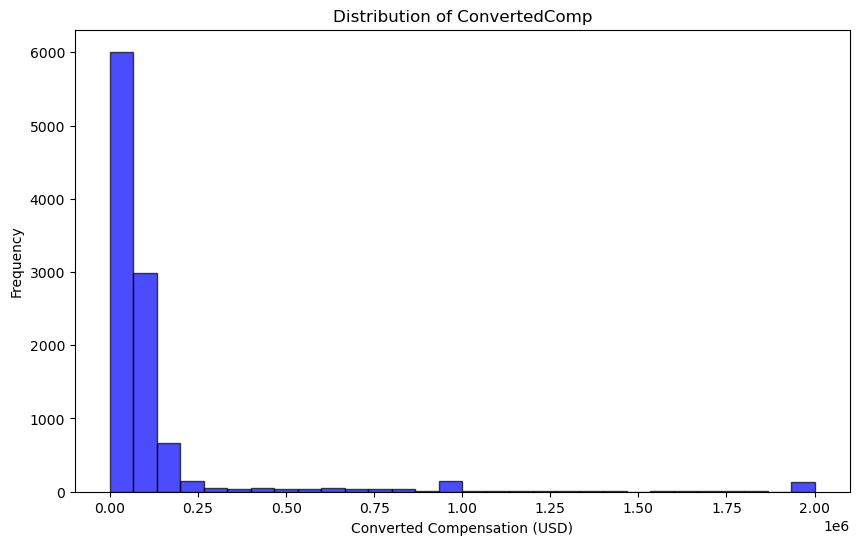

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

Plot the histogram for the column `ConvertedComp`.


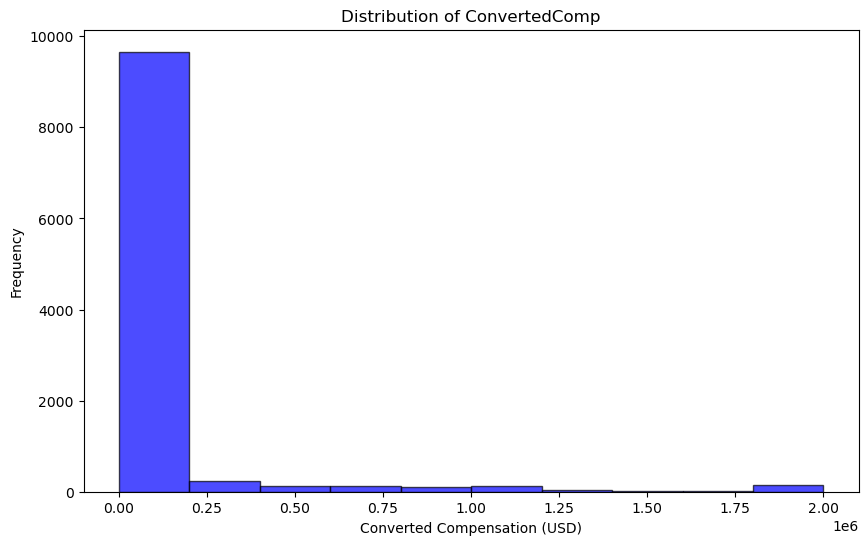

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of ConvertedComp')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

Finding the median of the column `ConvertedComp`


In [ ]:
df['ConvertedComp'].median()

57745.0

Find How many responders identified themselves only as a **Man**


In [ ]:
print(len(df[df['Gender'] == 'Man']))

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**


In [ ]:
print(len(df[df['Gender'] == 'Woman']))
x=df[df['Gender'] == 'Woman']
x['ConvertedComp'].median()

731


57708.0

In [ ]:
df['Age'].describe()
df['Age'].median()

29.0

Plot a histogram of the column `Age`.


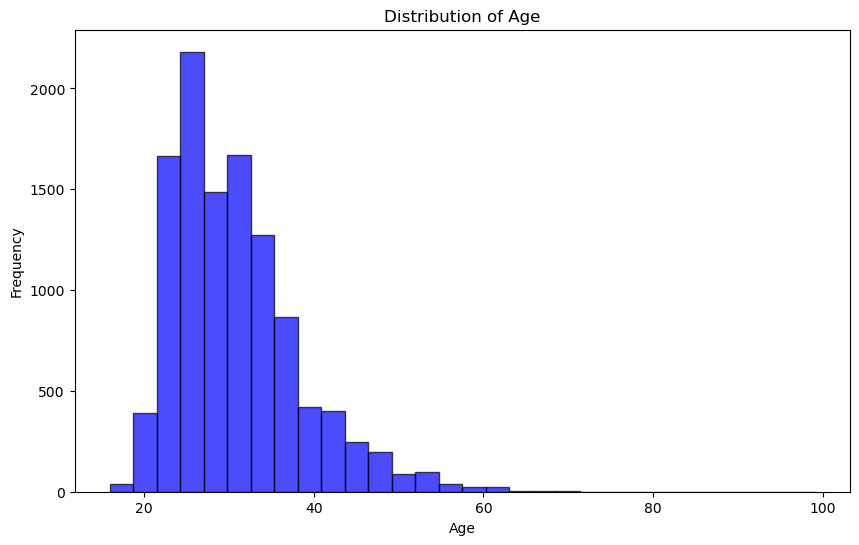

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot


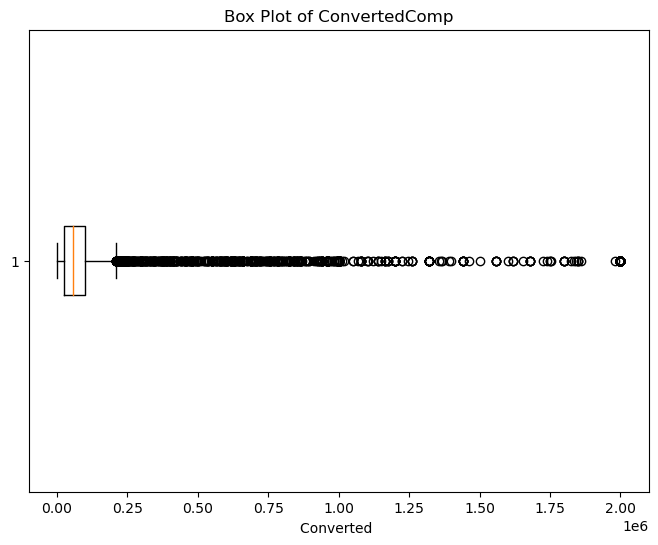

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['ConvertedComp'].dropna(), vert=False)
plt.title('Box Plot of ConvertedComp')
plt.xlabel('Converted ')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
q1 = df['ConvertedComp'].quantile(0.25)
q3 = df['ConvertedComp'].quantile(0.75)
iqr = q3 - q1
print(iqr)

73132.0


Find out the upper and lower bounds.


In [ ]:
lower_bound = q1 - 1.5 * iqr
print(lower_bound)
upper_bound = q3 + 1.5 * iqr
print(upper_bound)


-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
outliers = (df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)
num_outliers = outliers.sum()
print(num_outliers)

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
df_new = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]



## Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
numerical_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[['Age', *numerical_columns]].corr()
print(correlation_matrix)

                    Age  Respondent  CompTotal  ConvertedComp  WorkWeekHrs  \
Age            1.000000    0.004041   0.006970       0.105386     0.036518   
Respondent     0.004041    1.000000  -0.013490       0.002181    -0.015314   
CompTotal      0.006970   -0.013490   1.000000       0.001037     0.003510   
ConvertedComp  0.105386    0.002181   0.001037       1.000000     0.021143   
WorkWeekHrs    0.036518   -0.015314   0.003510       0.021143     1.000000   
CodeRevHrs    -0.020469    0.004621   0.007063      -0.033865     0.026517   
Age            1.000000    0.004041   0.006970       0.105386     0.036518   

               CodeRevHrs       Age  
Age             -0.020469  1.000000  
Respondent       0.004621  0.004041  
CompTotal        0.007063  0.006970  
ConvertedComp   -0.033865  0.105386  
WorkWeekHrs      0.026517  0.036518  
CodeRevHrs       1.000000 -0.020469  
Age             -0.020469  1.000000  
